In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [290]:
import pandas as pd 
  
# creating a data frame 
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv") 

print(df_train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
None


In [291]:
print(df_train.shape)
df_train.head()

(74051, 10)


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [292]:
le = LabelEncoder()

df_train.drop(columns = 'id', axis = 1, inplace = True)

df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [293]:
X_train = df_train.drop(columns=['Age'])
y_train = df_train['Age']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [294]:
def loss(x, y, w, b):
    y_hat = np.exp(x @ w + b)
    error = (y_hat - y * np.log(np.maximum(y_hat, 1e-8))).mean()  # Éviter log(0)
    return error


In [295]:
def grad(x, y, w, b):
    M, n = x.shape
    y_hat = np.exp(x @ w + b)
    dw = (x.T @ (y_hat - y)) / M
    db = (y_hat - y).mean()
    return dw, db

def poisson_gradient_descent(x, y, w, b, lr=0.01, epochs=100):
    m = len(y)
    loss_history = []
    
    for _ in range(epochs):
        y_hat = np.exp(x @ w + b)  

        dw = (x.T @ (y_hat - y)) / m
        db = np.sum(y_hat - y) / m

        w -= lr * dw
        b -= lr * db

        loss_history.append(loss(x, y, w, b))
    
    return w, b, loss_history

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


loss_history = []
poisson_model = PoissonRegressor(alpha=0.01, max_iter=1, warm_start=True)  # `warm_start=True` permet l'apprentissage itératif

num_iterations = 100
for i in range(num_iterations):
    poisson_model.fit(X_train_scaled, y_train)
    y_train_pred = poisson_model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_train_pred)
    loss_history.append(mse)



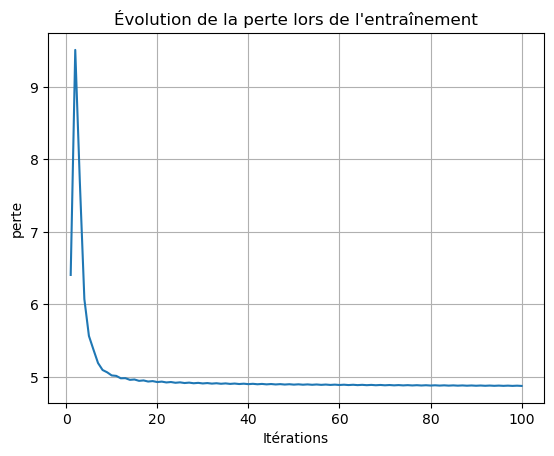

In [ ]:
plt.plot(range(1, num_iterations + 1), loss_history, linestyle='-')
plt.xlabel("Itérations")
plt.ylabel("perte")
plt.title("Évolution de la perte lors de l'entraînement")
plt.grid()
plt.show()

In [ ]:
y_train_pred = poisson_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)

print(f"Erreur quadratique moyenne (MSE) sur train: {mse:.4f}")

Erreur quadratique moyenne (MSE) sur train: 4.8766


In [ ]:
df_test.drop(columns=['id'], axis=1, inplace=True)
df_test['Sex'] = le.transform(df_test['Sex'])  # Utiliser le même encodeur
X_test_scaled = scaler.transform(df_test)

y_test_pred = poisson_model.predict(X_test_scaled)